In [1]:
# general imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Text processing imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text

In [2]:
# List adapeted from:
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

my_stops = text.ENGLISH_STOP_WORDS.union(
    
     ["ourselves", "hers", "between", "yourself", "but", "again",
     "there", "about", "once", "during", "out", "very", "having",
     "with", "they", "own", "an", "be", "some", "for", "do", "its",
     "yours", "such", "into", "of", "most", "itself", "other", "off",
     "is", "s", "am", "or", "who", "as", "from", "him", "each", "the",
     "themselves", "until", "below", "are", "we", "these", "your", "his", 
     "through", "don", "nor", "me", "were", "her", "more", "himself", "this",
     "down", "should", "our", "their", "while", "above", "both", "up", "to", 
     "ours", "had", "she", "all", "no", "when", "at", "any", "before", "them", 
     "same", "and", "been", "have", "in", "will", "on", "does", "yourselves", 
     "then", "that", "because", "what", "over", "why", "so", "can", "did", "not",
     "now", "under", "he", "you", "herself", "has", "just", "where", "too", "only",
     "myself", "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs",
     "my", "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than", "coronavirus", "covid",
     "cnn", "fox", "gutfeld", "like", "greg", "dana", "williams", 'juan', 'perino', 'jesse', 'watters',
     'katie', 'emily', 'tom', 'christmas', 'compagno', 'pavlich', 'shillue']

)

## Data

Articles from the following links:
http://transcripts.cnn.com/TRANSCRIPTS/2005/04/acd.01.html
http://transcripts.cnn.com/TRANSCRIPTS/2005/05/acd.01.html
https://www.foxnews.com/opinion/gutfeld-on-limiting-coronavirus-lawsuits
https://www.foxnews.com/opinion/gutfeld-trump-media-covid-pandemic


In [3]:
articles = pd.read_csv('all.csv')
articles.head()

,Unnamed: 0,source,text
0,0,CNN,string
1,1,CNN,"3. In what nation, whose leader is Boris Johns..."
2,2,CNN,"During this pandemic, restaurants have no long..."
3,3,CNN,"""The police showed up and we all searched for ..."
4,4,CNN,Thank you for using CNN 10


In [4]:
vectorizer = CountVectorizer(min_df=3, stop_words=my_stops)
counts = vectorizer.fit_transform(articles.text)

## LDA

In [5]:
as_topics = LatentDirichletAllocation(n_components=10, random_state=0, n_jobs=6).fit(counts)

In [6]:
def print_topics(topics,vectorizer):
    """
    Prints top 12 most important words for each topic in descending importance
    """
    topic_dists = (topics.components_.T / topics.components_.sum(axis=1)).T
    for comp in range(len(topic_dists)):
        top_i = np.argsort(topic_dists[comp])[-12:][::-1]
        print()
        print([key for key, value in vectorizer.vocabulary_.items() if value in top_i])

In [7]:
print_topics(as_topics, vectorizer)


['dr', 'gupta', 'think', 'know', 'people', 'time', 'right', 've', 'jones', 'pete', 'marie', 'lawrence']

['new', '10', 'click', 'news', 'thank', 'using', 'good', 'said', 'people', '2020', 'trump', 'sued']

['according', 'transcript', 'house', 'said', 'january', 'told', 'president', 'trump', 'administration', 'obama', 'ukraine', 'facts']

['house', 'said', 'case', 'president', 'trump', 'trial', 'senate', 'republicans', 'impeachment', 'democrats', 'witnesses', 'bolton']

['virus', 'dr', 'think', 'know', 'want', 'people', 'president', 'say', 'right', 'going', 've', 'really']

['click', 'news', 'said', 'people', '2020', 'president', 'trump', 'media', 'democratic', 'newsletter', 'bernie', 'sanders']

['world', 'international', '10', 'version', 'transcript', 'news', 'events', 'president', 'iran', 'prince', 'soleimani', 'iranian']

['good', 'think', 'got', 'know', 'right', 'going', 'oh', 'yeah', 'yes', 'jones', 'laughter', 'hegseth']

['says', 'said', 'white', 'vaccine', 'trump', 'yeah', 'im

In [8]:
article_dists = as_topics.transform(counts)
article_labels = np.argmax(article_dists, axis=1)
articles = articles.assign(article_labels= article_labels)
articles.head()

,Unnamed: 0,source,text,article_labels
0,0,CNN,string,7
1,1,CNN,"3. In what nation, whose leader is Boris Johns...",6
2,2,CNN,"During this pandemic, restaurants have no long...",4
3,3,CNN,"""The police showed up and we all searched for ...",5
4,4,CNN,Thank you for using CNN 10,1


In [9]:
# Get source counts for each topic
topic_counts = articles.groupby(['article_labels','source']).count()
topic_counts.drop(['text'], axis=1, inplace=True)
topic_counts.columns =['source_count']

unstacked_topics = topic_counts.unstack()
unstacked_topics = unstacked_topics.source_count
unstacked_topics = unstacked_topics.reindex(columns=['CNN', 'Fox'])
unstacked_topics = unstacked_topics.fillna(0)
unstacked_topics.head()

source,CNN,Fox
article_labels,,
0,6.0,0.0
1,73.0,0.0
2,46.0,0.0
3,20.0,0.0
4,43.0,0.0


In [10]:
topic_counts

source_count
article_labels source              
0              CNN                6
               FOX                1
1              CNN               73
               FOX               15
2              CNN               46
3              CNN               20
4              CNN               43
               FOX               14
5              CNN                8
               FOX               21
6              CNN               27
7              CNN                3
               FOX                4
8              CNN                3
9              CNN                5
               FOX               66

In [11]:
topic_counts.unstack()

source_count      
source                  CNN   FOX
article_labels                   
0                       6.0   1.0
1                      73.0  15.0
2                      46.0   NaN
3                      20.0   NaN
4                      43.0  14.0
5                       8.0  21.0
6                      27.0   NaN
7                       3.0   4.0
8                       3.0   NaN
9                       5.0  66.0

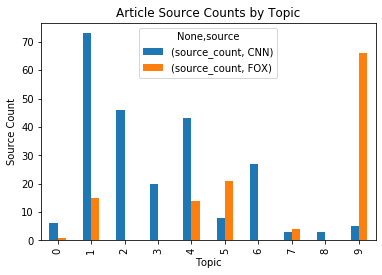

In [12]:
# Plot source counts for each topic
topic_counts.unstack().plot.bar(figsize=(6,4))
plt.title('Article Source Counts by Topic')
plt.xlabel('Topic')
plt.ylabel('Source Count')
plt.show()